# Energy Supply and GDP Data Analysis

## Load libraries and read data

In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib as plt

Energy = pd.read_excel('Energy Indicators.xls')
GDP = pd.read_excel('world_bank.xls')

## Clean energy supply data

In [34]:
#Drop first two columns
Energy.drop('Unnamed: 0', inplace=True, axis=1)
Energy.drop('Unnamed: 1', inplace=True, axis=1)

#Remove rows
Energy = Energy.drop(Energy.index[:17]).reset_index(drop=True)
Energy = Energy.drop(Energy.index[227:])

#Rename columns
Energy = Energy.rename(columns={'Unnamed: 2': 'Country', 'Unnamed: 3': 'Energy Supply', 
                                    'Unnamed: 4':'Energy Supply per Capita', 
                                    'Unnamed: 5': '% Renewable'})

Energy['Energy Supply'] = Energy['Energy Supply'].apply(lambda x: x*1000000)

#Change non-num to NaN
en = [x for x in Energy['Energy Supply']]
en_s = [x for x in Energy['Energy Supply per Capita']]
ren = [x for x in Energy['% Renewable']]

en_list = []
for x in en:
    if np.isreal(x) == False:
        x = np.NaN
        en_list.append(x)
    else:
        en_list.append(x)

en_s_list = []
for x in en_s:
    if np.isreal(x) == False:
        x = np.NaN
        en_s_list.append(x)
    else:
        en_s_list.append(x)

ren_list = []
for x in ren:
    if np.isreal(x) == False:
        x = np.NaN
        ren_list.append(x)
    else:
        ren_list.append(x)
    
dic = {'A': en_list, 'B': en_s_list, 'C': ren_list}

new = pd.DataFrame(dic)

Energy['Energy Supply'] = new['A']
Energy['Energy Supply per Capita'] = new['B']
Energy['% Renewable'] = new['C']

#Replace names of certain countries to match other dataset
Energy['Country'] = Energy['Country'].replace({"Republic of Korea": "South Korea",
"United States of America20": "United States",
"United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
"China, Hong Kong Special Administrative Region3": "Hong Kong"})

#Find country names that have ( ) and/or numbers
countries = [x for x in Energy['Country']]

wrong_chars = ['(', ')', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

countries_wrong_c = []

for country in countries:
    for char in wrong_chars:
        if char in country:
            countries_wrong_c.append(country)
            break

#Replace names of more countries'
Energy['Country'] = Energy['Country'].replace({'Australia1': 'Australia',
                    'Bolivia (Plurinational State of)':'Bolivia','China2':'China',
                    'China, Macao Special Administrative Region4':'China, Macao Special Administrative Region',
                    'Denmark5':'Denmark','Falkland Islands (Malvinas)':'Falkland Islands','France6':'France',
                    'Greenland7':'Greenland','Indonesia8':'Indonesia','Iran (Islamic Republic of)':'Iran',
                    'Italy9':'Italy','Japan10':'Japan','Kuwait11':'Kuwait',
                    'Micronesia (Federated States of)':'Micronesia','Netherlands12':'Netherlands',
                    'Portugal13':'Portugal','Saudi Arabia14':'Saudi Arabia','Serbia15':'Serbia',
                    'Sint Maarten (Dutch part)':'Sint Maarten','Spain16':'Spain','Switzerland17':'Switzerland',
                    'Ukraine18':'Ukraine','Venezuela (Bolivarian Republic of)':'Venezuela'})

## Clean GDP data

In [35]:
#Remove rows
GDP = GDP.drop(GDP.index[:4]).reset_index(drop=True)

#Drop unnamed columns 2-49
columns_to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7',
    'Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14',
    'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21',
    'Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28',
    'Unnamed: 29', 'Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35',
    'Unnamed: 36', 'Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42',
    'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49']
    
GDP.drop(columns_to_drop, inplace=True, axis=1)

#Drop unnamed columns 60-65
columns_to_drop2 = ['Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65']
GDP.drop(columns_to_drop2, inplace=True, axis=1)
    
#Rename remaining unnamed columns to keep track of years
GDP = GDP.rename(columns={'Unnamed: 50': '2006', 'Unnamed: 51': '2007', 'Unnamed: 52':'2008','Unnamed: 53': '2009', 
                          'Unnamed: 54':'2010', 'Unnamed: 55': '2011', 'Unnamed: 56': '2012','Unnamed: 57':'2013',
                          'Unnamed: 58':'2014','Unnamed: 59':'2015'})

#Drop all years except 2013
columns_to_drop3 = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2014', '2015']
GDP.drop(columns_to_drop3, inplace=True, axis=1)

#Drop world development indicators
GDP.drop('World Development Indicators', inplace=True, axis=1)

#Rename data source column
GDP = GDP.rename(columns={'Data Source': 'Country'})
    
#Rename 2013
GDP = GDP.rename(columns={'2013': 'GDP'})

GDP['Country'] = GDP['Country'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran",
                                        "Hong Kong SAR, China": "Hong Kong"})

countries2 = [x for x in GDP['Country']]

## Merge datasets

In [36]:
data = pd.merge(Energy, GDP, how='left', on='Country')

data = data.set_index('Country', inplace=False)
data['Population'] = data['Energy Supply'] / data['Energy Supply per Capita']
data['GDP per Capita'] = data['GDP'] / data['Population']
    
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
data

,Energy Supply,Energy Supply per Capita,% Renewable,GDP,Population,GDP per Capita
Country,,,,,,
Afghanistan,3.210000e+08,10.0,78.66928,2.014640e+10,3.210000e+07,627.613863
Albania,1.020000e+08,35.0,100.00000,1.277622e+10,2.914286e+06,4383.997233
Algeria,1.959000e+09,51.0,0.55101,2.097550e+11,3.841176e+07,5460.696869
Andorra,9.000000e+06,121.0,88.69565,3.193513e+09,7.438017e+04,42935.007439
Angola,6.420000e+08,27.0,70.90909,1.334016e+11,2.377778e+07,5610.347431
...,...,...,...,...,...,...
Uruguay,1.960000e+08,58.0,71.60504,5.753123e+10,3.379310e+06,17024.548645
Uzbekistan,1.798000e+09,62.0,21.32841,7.318004e+10,2.900000e+07,2523.449541
Vanuatu,3.000000e+06,10.0,14.70588,7.583045e+08,3.000000e+05,2527.681554


## Estimate Pearson correlation coefficients

In [37]:
corr, pval = stats.pearsonr(data['Energy Supply per Capita'], data['GDP per Capita'])
print('Pearson correlation coefficient (Energy Supply per Capita): ' + str(corr))
    
corr, pval = stats.pearsonr(data['Energy Supply'], data['GDP'])
print('Pearson correlation coefficient (Energy Supply): ' + str(corr))

Pearson correlation coefficient (Energy Supply per Capita): 0.5528618837445082
Pearson correlation coefficient (Energy Supply): 0.8808257856850727


## Plot results

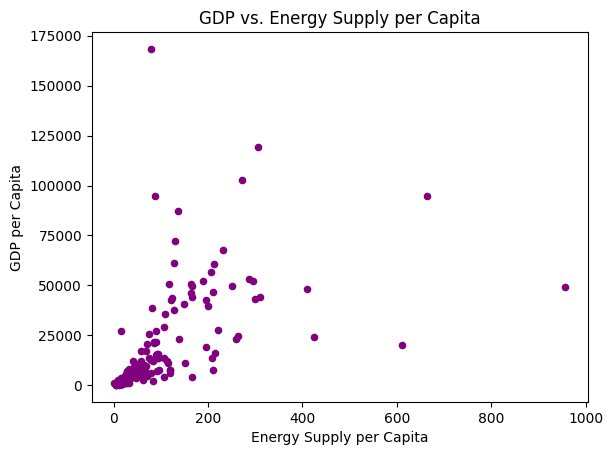

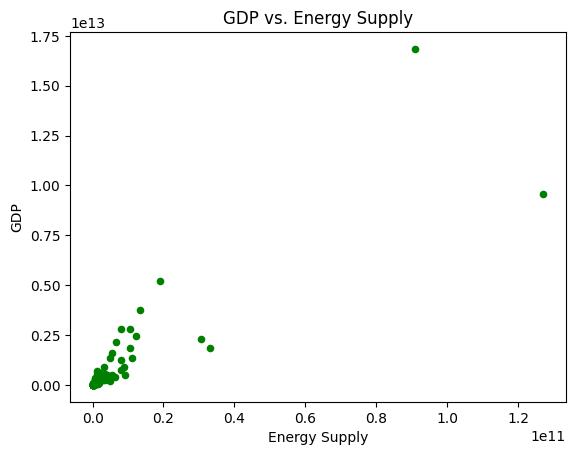

In [38]:
data.plot(x='Energy Supply per Capita', y='GDP per Capita', kind='scatter', 
          title='GDP vs. Energy Supply per Capita',color = 'purple');
data.plot(x='Energy Supply', y='GDP', kind='scatter', title='GDP vs. Energy Supply', color = 'green');